# ♪健康経営のための疾患リスク予測
# ~ AI Quest アセスメント ~

In [97]:
# データ分析・整理
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

# 機械学習
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [98]:
# データ取得
train_df = pd.read_csv('C:/Users/yktft/python/SIGNATE/健康経営のための疾患リスク予測/train.csv')
test_df = pd.read_csv('C:/Users/yktft/python/SIGNATE/健康経営のための疾患リスク予測/test.csv')

In [99]:
# 前処理
train_df["AG_ratio"].fillna(train_df["Alb"] / (train_df["TP"] - train_df["Alb"]), inplace=True)
test_df["AG_ratio"].fillna(test_df["Alb"] / (test_df["TP"] - test_df["Alb"]), inplace=True)

train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

train_df["Gender"] = train_df["Gender"].apply(lambda x: 1 if x=="Male" else 0)
test_df["Gender"] = test_df["Gender"].apply(lambda x: 1 if x=="Male" else 0)

X = train_df.drop(["disease"], axis=1)
y = train_df["disease"]

# 標準化
stdsc = StandardScaler()
scaler = MinMaxScaler()
X_target = pd.concat([pd.DataFrame(stdsc.fit_transform(X[['Age', 'T_Bil', 'D_Bil','ALP','ALT_GPT','AST_GOT','TP','Alb','AG_ratio']]),
                            columns=['Age', 'T_Bil', 'D_Bil','ALP','ALT_GPT','AST_GOT','TP','Alb','AG_ratio']),
                            X[['Gender']]],axis=1)
test_df_scaled = pd.concat([pd.DataFrame(stdsc.transform(test_df[['Age', 'T_Bil', 'D_Bil','ALP','ALT_GPT','AST_GOT','TP','Alb','AG_ratio']]),
                            columns=['Age', 'T_Bil', 'D_Bil','ALP','ALT_GPT','AST_GOT','TP','Alb','AG_ratio']),
                            test_df[['Gender']]],axis=1)

#X_target = X_target.drop(["Gender"], axis=1)
#test_df_scaled = test_df_scaled.drop(["Gender"], axis=1)

#X_target = X_target.drop(["D_Bil"], axis=1)
#test_df_scaled = test_df_scaled.drop(["D_Bil"], axis=1)

#X_target = X_target.drop(["ALP"], axis=1)
#test_df_scaled = test_df_scaled.drop(["ALP"], axis=1)

#X_target = X_target.drop(["ALT_GPT"], axis=1)
#test_df_scaled = test_df_scaled.drop(["ALT_GPT"], axis=1)

In [100]:
X_target

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender
0,0.753431,-0.335955,-0.290949,-0.259863,-0.195492,-0.356975,-0.257757,-0.724042,-0.606631,1
1,1.361556,-0.247057,-0.262171,-0.254671,0.062088,0.033929,-0.169826,-0.832608,-1.731472,1
2,1.118306,-0.389083,-0.335085,0.242516,-0.201270,-0.276256,-1.290839,-1.837506,-1.627531,1
3,1.118306,-0.286844,-0.250342,0.484775,-0.052323,-0.059131,-0.077493,0.172224,-0.688739,1
4,-1.496631,0.052258,-0.260844,-0.246862,-0.146773,0.990291,-1.422039,-0.801915,-0.519213,0
...,...,...,...,...,...,...,...,...,...,...
845,-1.314194,-0.343913,-0.268011,-0.282450,-0.192094,-0.371224,-0.246754,0.187604,0.674411,1
846,0.631806,-0.302763,-0.286804,-0.291669,-0.187972,-0.371573,0.568460,0.181706,0.670500,1
847,0.206119,-0.319617,-0.298346,-0.209115,-0.010171,-0.103554,0.592201,0.369809,-0.693678,1
848,-0.888506,-0.346157,-0.298939,-0.289870,-0.164083,-0.059698,-1.294305,-0.654882,0.335604,0


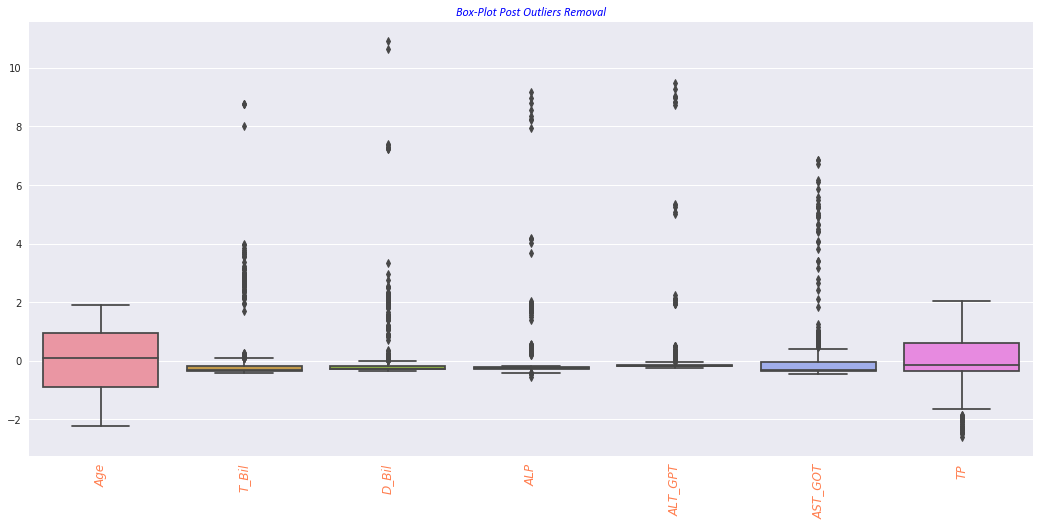

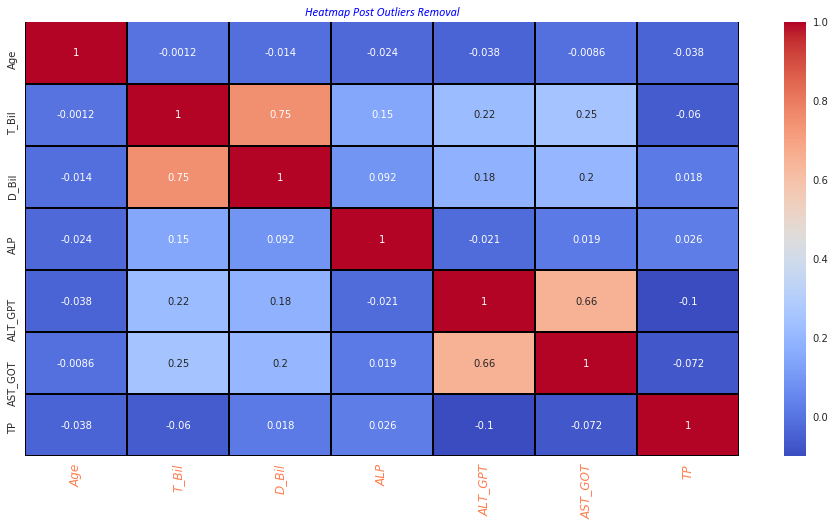

In [101]:
def plot_data(df_name):
    """
    This function is plotting the box plot of the dataframe.

    Parameters
    ----------
    df_name : DataFrame
        DESCRIPTION.

    Returns
    -------
    None.

    """
    with plt.style.context('seaborn'):
        plt.figure(figsize=(18,8))
        sns.boxplot(data=df_name.iloc[:,:])
        plt.title("Box-Plot Post Outliers Removal",fontdict={'size':12,'color':'blue','style':'oblique','family':'calibri'})
        plt.xticks(size=12,rotation=90,style='oblique',color='coral')
    plt.show()
    
    with plt.style.context('seaborn'):
        plt.figure(figsize=(16,8))
        sns.heatmap(df_name.corr(),cmap='coolwarm',annot=True,cbar=True,linecolor='k',linewidths=0.9)
        plt.title("Heatmap Post Outliers Removal",fontdict={'size':12,'color':'blue','style':'oblique','family':'calibri'})
        plt.xticks(size=12,rotation=90,style='oblique',color='coral')
    plt.show()

plot_data(X_target.iloc[:,:7])

In [102]:
# 学習用・評価用データの分割（元の説明変数Xの代わりに、特徴量選択後のX_polynomial_maskedを使う）
X_train, X_test, y_train, y_test = train_test_split(X_target, y, test_size=0.01, random_state=100)

In [103]:
# モデルの学習・予測
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:, 1]

# ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）
#fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
#plt.plot(fpr, tpr, label='roc curve')
#plt.plot([0, 1], [0, 1], linestyle=':', label='random')
#plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
#plt.legend()
#plt.xlabel('false positive rate')
#plt.ylabel('true positive rate')
#plt.show()

# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_test, y_score=y_pred)
print("AUC:", auc_score)

AUC: 0.65


In [104]:
rfc = RandomForestClassifier(
                                    n_estimators=25,random_state=11,
                                    max_depth=10,
                                    min_samples_split=2,
                                    class_weight={0:0.66,1:0.37},
                                    min_samples_leaf=2,
                                    max_features='auto'
                                    )

rfc.fit(X_train, y_train)
y_pred = rfc.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_true=y_test, y_score=y_pred)
print("AUC:", auc_score)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.66, 1: 0.37}, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=25, n_jobs=None, oob_score=False,
                       random_state=11, verbose=0, warm_start=False)

## ♪ モデル、予測、解決

- ロジスティック回帰

In [106]:
#y_pred_submit = lr.predict_proba(test_df_scaled)[:, 1]
y_pred_submit = rfc.predict_proba(test_df_scaled)[:, 1]

#submission = pd.DataFrame({
#    "y": y_pred_submit
#})
#submission.to_csv("submit.csv", index=False)


np.savetxt('submit.csv', y_pred_submit, delimiter=',')
#y_pred_submit